<a href="https://colab.research.google.com/github/Matthev00/WMM/blob/main/LAB3/WMM_2024_may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**Wstęp**
`ver. 01.2024`

---
Notatnik jest podzielony na dwie sekcje. W pierwszej sekcji pt. <b>"Synteza mowy"</b> jest zaimplementowanych kilka otwarto-źródłowych algorytmów syntezy mowy TTS (Text-To-Speech). W drugiej sekcji pt. <b>"Rozpoznawanie mowy"</b> znajduje się implementacja wybranych algorytmów rozpoznawania mowy do tekstu pisanego STT (Speech-To-Text).

<mark>Szczególnie zalecane jest wykorzystanie przeglądarki Google Chrome</mark>
---


#**Polecenia**


---

1. W sekcji **"Synteza mowy"** proszę uruchomić każdy z algorytmów z wymyśloną przez Państwa sekwencją słów w języku angielskim lub polskim (zależnie od modelu: modele XTTS (Coqui.ai) oraz TTS Google - język polski, modele  TTS Tacotron2+Waveglow (NVIDIA) - język angielski ) <mark> wynikowe pliki dźwiękowe automatycznie zapisują się na dysk w podanej lokalizacji</mark>, a następnie:
  * w czasie, gdy wykonuje się krok 3 wykonaj krok 4 !!!
  * w trakcie wykonywania kroku 5 dla modelu XTTS (Coqui.ai) przy inicjalizacji modelu należy zaakceptować warunki korzystania z modelu (pojawiające się puste okienko w terminalu - należy wpisać w nie y i kliknąć enter)
2. W sekcji **"Rozpoznawanie mowy"** proszę uruchomić każdy z algorytmów po kolei. Plik dźwiękowy może być plikiem wcześniej nagranym przez Was albo wgranym z zewnątrz. <b>UWAGA:</b> tylko język polski!
  * przy reinstalacji bibliotek (1 krok w testowaniu każdego z modeli) należy potwierdzić odinstalowanie każdej z biblioteki - wpisać w pojawiające się w terminalu pole y i wcisnąć enter
  * przed uruchomieniem każdego z modeli ASR (przed krokiem Automatyczne rozpoznawanie mowy - model) należy ponownie uruchomić komórkę "Odtwórz wgrany do Dysku Google dźwięk" z części Synteza Mowy
  * zapisać nagrany przez Was tekst, a w sprawozdaniu zapisać teksty, które udało sie rozpoznać każdemu z algorytmów wraz z wartością tzw. miary WER (<i>word error rate</i>) oraz CER (<i>character error rate</i>)
---


#**Sprawozdanie**


---


W sprawozdaniu należy:

*   dokonać subiektywnej oceny wyników syntezy mowy - na podstawie własnych wrażeń słuchowych opisać różnice między modelami. Napisz, który z nich jest w stanie bardziej naturalnie syntetyzować ludzką mowę. (2 punkty)
* dokonać analizy porównawczej spektrogramów Waszego oryginalnego nagrania (albo pliku zewnętrznego w zależności od tego, co wybraliście) z poprzedniego punktu oraz plików po syntezie (w [oprogramowaniu Audacity](https://manual.audacityteam.org/man/spectrogram_view.html)) i zapisać wnioski (większa/mniejsza energia w pasmach, inne zakresy częstotliwości między ludzką  mową, a wersjami po syntezie itp.) (2 punkty)
*   porównać spektrogram rzeczywistego nagrania i syntezy mowy metodą Voice Cloning (1 punkt)
*   dokonać oceny jakości syntezy mowy na podstawie 5 stopniowej oceny MOS (przeprowadzonej na podstawie ankiety wśród 5 osób, przedstawić statystyczne wyniki ankiety) (1 punkt)
*   dokonać oceny jakości syntezy mowy metodą voice cloning oraz różnić między nagraniem rzeczywistym, a syntezą na podstawie ankiety 5 stopniowej MOS (przeprowadzonej na podstawie ankiety wśród 5 osób, przedstawić statystyczne wyniki ankiety) (1 punkt)
Przykład skali MOS:
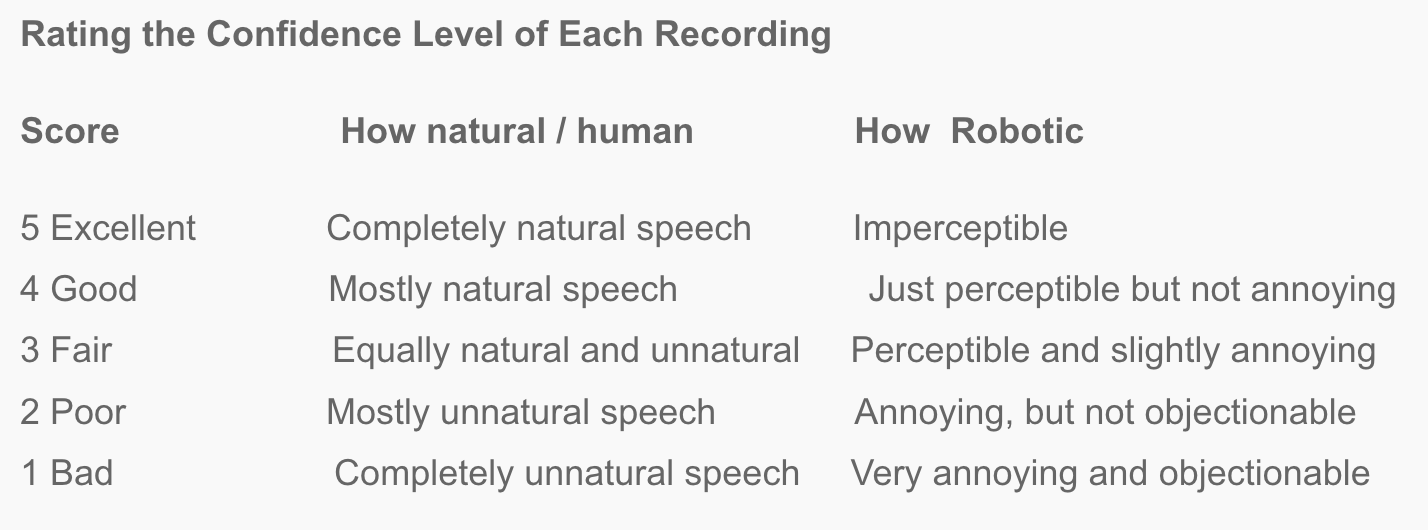
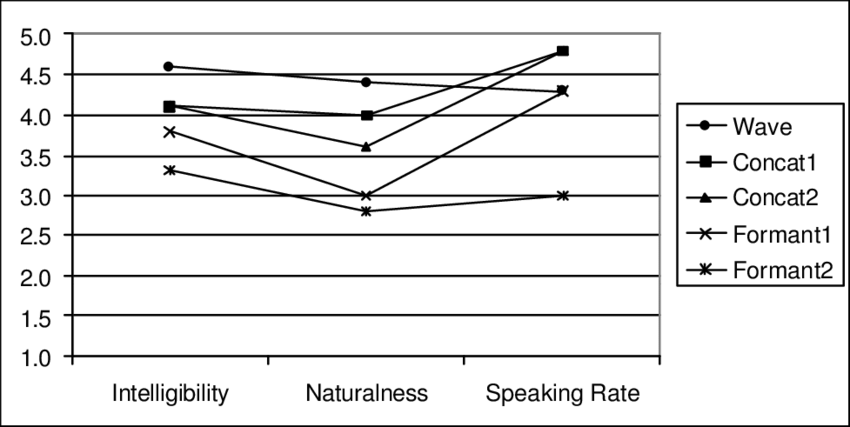
*   zawrzeć tabelę z wynikami działania modeli ASR (uzyskane transkrypcje mowy) (1 punkt)
*   zawrzeć tabelę z wynikami WER i CER dla przetestowanych modeli ASR, skomentować we wnioskach uzyskane wyniki (1 punkt)
* napisać wnioski (3 punkty)
* razem ze sprawozdaniem należy przesłać wygenerowane przez syntezatory mowy wyniki

<br>
<h3><b><mark>Sprawozdania mają formę dokumentu w dowolnym formacie (.pdf, .docx, .odt, ...) oraz dołączonych do sprawozdania plików dźwiękowych z syntetyzowaną mową oraz nagraniem Waszego głosu. Łącznie za sprawozdanie można uzyskać 12 punktów !!!<mark><b><h3>

---


# Wprowadzenie do Google Colab


---
Krótkie wyjaśnienie jak korzystać z notatników w systemie Google Colab:

https://colab.research.google.com/notebooks/basic_features_overview.ipynb

# Synteza Mowy "TEXT-TO-SPEECH"

In [ ]:
# @title Krok 1: Sprawdź czy GPU i CUDA są dostępne w tym notatniku
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available. Running on CPU-only mode.")

CUDA is available.


In [4]:
# @title Krok 2: Łączenie notatnika colab z dyskiem google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Krok 3: Inicjalizacja, instalacja oraz import niezbędnych bibliotek oraz modułów.

#@markdown Uruchomienie za pomocą <code>CTRL+Enter</code> albo ikony <code>play</code>.
#@markdown Po dwukrotnym kliknięciu w okno tekstowe otworzy się panel edycji kodu źródłowego.
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!sudo apt install espeak
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio
!pip install scipy
!pip install gTTS
!pip install TTS
!pip install numpy scipy librosa unidecode inflect librosa
!apt-get update
!apt-get install -y libsndfile1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (960 kB

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,122 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,462 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,850 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/p

  ### Krok 4: Nagraj próbkę mowy w programie Audacity lub pobierz z Interentu. Wyeksprotuj próbkę jako STEREO WAV i MONO WAV. Załaduj nagrania na dysk Google do folderu WMM. We wszystkich modelach poza QuartzNet i FastConformer ASR wykorzystaj STEREO WAV. Do modeli QuartzNet i FastConformer ASR wykorzystaj MONO WAV.

In [5]:
# @title Odtwórz wgrany do Dysku Google dźwięk STREREO WAV
#@markdown Wpisz ścieżkę do pliku STREREO WAV w przestrzeni Dysku Google z nagraniem głosu
from IPython.display import Audio, display

recording_path = "/content/drive/MyDrive/Andrzej_stereo.wav" #@param {type:"string"}
display(Audio(recording_path, autoplay=True))

In [6]:
# @title Odtwórz wgrany do Dysku Google dźwięk MONO WAV
#@markdown Wpisz ścieżkę do pliku MONO WAV w przestrzeni Dysku Google z nagraniem głosu
from IPython.display import Audio, display

recording_mono_path = "/content/drive/MyDrive/Andrzej_mono.wav" #@param {type:"string"}
display(Audio(recording_mono_path, autoplay=True))

### Krok 5: Testowanie syntezy mowy "TEXT-TO-SPEECH"

In [ ]:

# @title Model TTS Google - synteza mowy, znany dla modelu głos
from scipy.io import wavfile
from gtts import gTTS
from IPython.display import Audio

#@markdown Wpisz zdanie do syntezy
text = "Mam na imię Mateusz" #@param {type:"string"}
#@markdown Wpisz nazwę, pod którą chcesz zpisać plik
synthesis_filename= "tts_google" #@param {type:"string"}
#@markdown Wpisz ścieżkę do zapisu pliku
save_path= "/content/drive/MyDrive/WMM" #@param {type:"string"}
#@markdown Wybierz język syntezy (polski lub angielski)
lang = 'pl' #@param ["en", "pl"]

save_path = f'{save_path}/{synthesis_filename}.wav'

tts = gTTS(text,lang=lang)
tts.save(save_path)

Audio(save_path, autoplay=True)

In [ ]:
# @title Modele TTS Tacotron2+Waveglow (NVIDIA) - synteza mowy, znany dla modelu głos

import torch
# device = torch.device('cpu')
tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')

waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')

#@markdown Wpisz zdanie do syntezy (dostępny jedynie język angielski)
text = "My name is Matthev." #@param {type:"string"}
#@markdown Wpisz nazwę, pod którą chcesz zpisać plik
synthesis_filename= "tacotron" #@param {type:"string"}
#@markdown Wpisz ścieżkę do katalogu, w którym plik ma być zapisany
save_path= "/content/drive/MyDrive/WMM" #@param {type:"string"}

save_path = f'{save_path}/{synthesis_filename}.wav'

import numpy as np
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')
sequences, lengths = utils.prepare_input_sequence([text])

with torch.no_grad():
    mel, _, _ = tacotron2.infer(sequences, lengths)
    audio = waveglow.infer(mel)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

from scipy.io.wavfile import write
# write(save_path, rate, audio_numpy)
# from google.colab import files
# files.download("voice_synth_T2WaveGlow.wav")

scaled = np.int16(audio_numpy / np.max(np.abs(audio_numpy)) * 32767)
write(save_path, rate, scaled)

from IPython.display import Audio
Audio(save_path, rate=rate)


Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
Using cache found in /root/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
# @title Model XTTS (Coqui.ai) - synteza mowy, znany dla modelu głos, Voice cloning
from TTS.api import TTS
from IPython.display import Audio, display

from TTS.api import TTS

tts1 = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

#@markdown Wpisz zdanie do syntezy i język syntezy
text = "Mam na imię Mateusz." #@param {type:"string"}
#@markdown Wpisz nazwę, pod którą chcesz zpisać plik
synthesis_filename= "coqui" #@param {type:"string"}
#@markdown Wpisz ścieżkę do zapisu pliku z syntezą mowy
save_path= "/content/drive/MyDrive/WMM" #@param {type:"string"}
#@markdown Wybierz język syntezy
lang = 'pl' #@param ["en", "pl"]

save_path = f'{save_path}/{synthesis_filename}.wav'

# generate speech by cloning a voice using default settings
audio = tts1.tts_to_file(text=text,
                file_path=save_path,
                speaker_wav=recording_path,
                language=lang)

# odtwórz wynik
display(Audio(save_path, autoplay=True))

/usr/local/lib/python3.10/dist-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


 > You must confirm the following:
 | > "I have purchased a commercial license from Coqui: licensing@coqui.ai"
 | > "Otherwise, I agree to the terms of the non-commercial CPML: https://coqui.ai/cpml" - [y/n]
 | | > y
 > Downloading model to /root/.local/share/tts/tts_models--multilingual--multi-dataset--xtts_v2


100%|█████████▉| 1.86G/1.87G [00:29<00:00, 82.4MiB/s]
100%|██████████| 1.87G/1.87G [00:29<00:00, 63.2MiB/s]
100%|██████████| 4.37k/4.37k [00:00<00:00, 10.5kiB/s]

100%|██████████| 361k/361k [00:00<00:00, 821kiB/s]
100%|██████████| 32.0/32.0 [00:00<00:00, 71.0iB/s]
 82%|████████▏ | 6.37M/7.75M [00:00<00:00, 35.5MiB/s]

 > Model's license - CPML
 > Check https://coqui.ai/cpml.txt for more info.
 > Using model: xtts


100%|██████████| 7.75M/7.75M [00:16<00:00, 35.5MiB/s]

 > Text splitted to sentences.
['Mam na imię Mateusz.']
 > Processing time: 11.54593300819397
 > Real-time factor: 0.6925072431961228


# Rozpoznawanie mowy "SPEECH-TO-TEXT"

**W tym zadaniu wykorzystaj jedynie plik wav z nagraniem twojego głosu (nie pliki wygenerowane przez syntezatory mowy)**


## Model wielojęzykowy Whisper (wersja base) - OpenAI

In [ ]:
# @title Instalowanie niezbędnych bibliotek
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install -U openai-whisper
!pip install setuptools-rust
!pip install pydub
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=3630731914614b51754a1ee438aeeafe1629f1b725f378a66894a60428ab943d
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.5 MB/s eta 0:00:00


In [ ]:
# @title Automatyczne rozpoznawanie mowy - model Whisper (base)
import whisper

asr_model = whisper.load_model("base")
import pandas as pd
import re
from jiwer import wer

predict = asr_model.transcribe(recording_path)
print(f'Whisper (base) language prediction: {predict["language"]}')
print(f'Whisper (base) speech prediction: {predict["text"]}')


  0%|                                               | 0.00/139M [00:00<?, ?iB/s]
  8%|██▉                                    | 10.6M/139M [00:00<00:01, 101MiB/s]
 16%|██████▎                                | 22.5M/139M [00:00<00:01, 115MiB/s]
 24%|█████████▍                             | 33.5M/139M [00:00<00:01, 109MiB/s]
 33%|████████████▉                          | 45.9M/139M [00:00<00:00, 116MiB/s]
 41%|████████████████                       | 57.0M/139M [00:00<00:00, 109MiB/s]
 50%|███████████████████▋                   | 69.9M/139M [00:00<00:00, 117MiB/s]
 60%|███████████████████████▍               | 83.1M/139M [00:00<00:00, 124MiB/s]
 69%|██████████████████████████▉            | 95.7M/139M [00:00<00:00, 126MiB/s]
 78%|███████████████████████████████▏        | 108M/139M [00:00<00:00, 122MiB/s]
 86%|██████████████████████████████████▌     | 120M/139M [00:01<00:00, 123MiB/s]
100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 119MiB/s]


Whisper (base) language prediction: pl
Whisper (base) speech prediction:  O, wiem. Człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej? No nie, no by byłem na granicy fizycznej wytrzymałości. Między by się nie dało zrobić.


In [ ]:
# @title Ocena sprawności modelu Whisepr (tiny)
#@markdown Wpisz rzeczywisty tekst zawarty w nagraniu (tekst referencyjny)
text = "O, wiem. Człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej? No nie, no by byłem na granicy fizycznej wytrzymałości. Więcej by się nie dało zrobić." #@param {type:"string"}

from jiwer import wer
from jiwer import cer

wer = round(wer(text, predict['text'])*100, 2)
print(f'WER: {wer}')

cer = round(cer(text, predict['text'])*100, 2)
print(f'CER: {cer}')

WER: 3.33
CER: 2.11


## Model Wav2vec przystosowany do rozpoznawania j.polskiego - Meta

In [ ]:
# @title Odinstalowanie wersji bibliotek potrzebnych w poprzedniej części zadania
!pip uninstall tensorflow
!pip uninstall numpy
!pip uninstall TTS

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: numpy 1.22.0
Uninstalling numpy-1.22.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.22.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so
    /usr/local/lib/pyt

In [ ]:
# @title Instalowanie niezbędnych bibliotek
!pip install huggingsound
!pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 100.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uni

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 969.8 kB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
# @title Automatyczne rozpoznawanie mowy - model Wav2Vec2-large-xlsr-53-polish

from huggingsound import SpeechRecognitionModel

model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-polish")
predict  = model.transcribe([recording_path])
predict = predict [0]['transcription']
print(f'Wav2Vec2-large-xlsr-53-polish speech prediction: {predict}')

INFO:huggingsound.speech_recognition.model:Loading model...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

100%|██████████| 1/1 [00:16<00:00, 16.90s/it]

Wav2Vec2-large-xlsr-53-polish speech prediction: oh wiem człowiek zadaje sobie jedno pytanie ono ma fundamentalne znaczenie czy mogłem zrobić więcejno nie o wybyłem nagranice fizycznej wytrzymałości więce by się nie dało zrobić


In [ ]:
# @title Ocena sprawności modelu Wav2Vec2-large-xlsr-53-polish
#@markdown Wpisz rzeczywisty tekst zawarty w nagraniu (tekst referencyjny)
text = "O, wiem. Człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej? No nie, no by byłem na granicy fizycznej wytrzymałości. Więcej by się nie dało zrobić." #@param {type:"string"}

from jiwer import wer
from jiwer import cer

wer = round(wer(text, predict)*100, 2)
print(f'WER: {wer}')

cer = round(cer(text, predict)*100, 2)
print(f'CER: {cer}')

WER: 56.67
CER: 10.53


## Modele QuartzNet i FastConformer przystosowane do rozpoznawania j.polskiego - NVIDIA

In [ ]:
# @title Odinstalowanie wersji bibliotek potrzebnych w poprzedniej części zadania
!pip uninstall huggingsound
!pip uninstall setuptools
!pip uninstall cvxpy
!pip uninstall tensorflow

Found existing installation: huggingsound 0.1.6
Uninstalling huggingsound-0.1.6:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/huggingsound-0.1.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/huggingsound/*
Proceed (Y/n)? Y
  Successfully uninstalled huggingsound-0.1.6
Found existing installation: setuptools 67.7.2
Uninstalling setuptools-67.7.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/_distutils_hack/*
    /usr/local/lib/python3.10/dist-packages/distutils-precedence.pth
    /usr/local/lib/python3.10/dist-packages/pkg_resources/*
    /usr/local/lib/python3.10/dist-packages/setuptools-67.7.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/setuptools/*
Proceed (Y/n)? Y
  Successfully uninstalled setuptools-67.7.2
Found existing installation: cvxpy 1.3.4
Uninstalling cvxpy-1.3.4:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/_cvxcore.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/cvxpy-1.3.4.dis

In [1]:
# @title Instalowanie niezbędnych bibliotek
!apt-get update && apt-get install -y libsndfile1 ffmpeg
!pip install Cython
!pip install nemo_toolkit['all']

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,462 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,122 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main 

In [1]:
!pip install tensorflow==2.15.1
!pip install setuptools==65.5.1
!pip install cvxpy==1.2.0
!pip install fleep

  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
  Using cached setuptools-65.5.1-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.3.4 requires setuptools>65.5.1, but you have setuptools 65.5.1 which is

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstalling cvxpy-1.3.4:
      Successfully uninstalled cvxpy-1.3.4
  Preparing metadata (setup.py) ... done
  Created wheel for fleep: filename=fleep-1.0.1-py3-none-any.whl size=6105 sha256=00672b364f4d6c2b2b8cf7fbcf986e33249103591dfb71b199fd2b2831290089
  Stored in directory: /root/.cache/pip/wheels/98/75/ab/b791cc46a99c0b865f1abf77adcd5fea08fe2ca93fe7743f72
Successfully built fleep


In [7]:
# @title Automatyczne rozpoznawanie mowy - model stt_pl_QuartzNet15x5
import nemo.collections.asr as nemo_asr
asr_model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_pl_quartznet15x5")
predict = asr_model.transcribe([recording_mono_path])
predict = predict[0]
print(f'stt_pl_QuartzNet15x5 speech prediction: {predict}')

[NeMo I 2024-05-21 12:27:42 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.23.0/stt_pl_quartznet15x5/a0688bd9116271719abfca130a32ac92/stt_pl_quartznet15x5.nemo.
[NeMo I 2024-05-21 12:27:42 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.23.0/stt_pl_quartznet15x5/a0688bd9116271719abfca130a32ac92/stt_pl_quartznet15x5.nemo
[NeMo I 2024-05-21 12:27:42 common:924] Instantiating model from pre-trained checkpoint


[NeMo W 2024-05-21 12:27:42 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /raid/noneval.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - ą
    - b
    - c
    - ć
    - d
    - e
    - ę
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - ł
    - m
    - 'n'
    - ń
    - o
    - ó
    - p
    - r
    - s
    - ś
    - t
    - u
    - w
    - 'y'
    - z
    - ź
    - ż
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    num_workers: 8
    pin_memory: true
    
[NeMo W 2024-05-21 12:27:42 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data l

[NeMo I 2024-05-21 12:27:42 features:289] PADDING: 16
[NeMo I 2024-05-21 12:27:43 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.23.0/stt_pl_quartznet15x5/a0688bd9116271719abfca130a32ac92/stt_pl_quartznet15x5.nemo.


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

stt_pl_QuartzNet15x5 speech prediction: oo wiem człowiek zadaje sobie jedno pytania kona mafu nament alne naczeń czy mogłym zrobić więcejno nie abybyłem ma granicy fizycznejo trzymałości więce by się nie dało zrobić


In [8]:
# @title Ocena sprawności modelu stt_pl_QuartzNet15x5
#@markdown Wpisz rzeczywisty tekst zawarty w nagraniu (tekst referencyjny)
text = "O, wiem. Człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej? No nie, no by byłem na granicy fizycznej wytrzymałości. Więcej by się nie dało zrobić." #@param {type:"string"}

from jiwer import wer
from jiwer import cer

wer_index = round(wer(text, predict)*100, 2)
print(f'WER: {wer_index }')

cer_index = round(cer(text, predict)*100, 2)
print(f'CER: {cer_index }')

WER: 70.0
CER: 18.42


In [9]:
# @title Automatyczne rozpoznawanie mowy - model stt_pl_FastConformer_hybrid_large_pc
import nemo.collections.asr as nemo_asr
asr_model = nemo_asr.models.EncDecHybridRNNTCTCBPEModel.from_pretrained(model_name="nvidia/stt_pl_fastconformer_hybrid_large_pc")
predict = asr_model.transcribe([recording_mono_path])
predict = predict[0][0]
print(f'stt_pl_FastConformer speech prediction: {predict}')

[NeMo W 2024-05-21 12:28:16 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
    The secret `HF_TOKEN` does not exist in your Colab secrets.
    To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
    You will be able to reuse this secret in all of your notebooks.
    Please note that authentication is recommended but still optional to access public models or datasets.
      warnings.warn(
    


(…)tt_pl_fastconformer_hybrid_large_pc.nemo:   0%|          | 0.00/459M [00:00<?, ?B/s]

[NeMo I 2024-05-21 12:28:25 mixins:172] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-05-21 12:28:27 modelPT:165] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath:
    - /datasets/pl_asr_dataset/mcv-train.json
    - /datasets/pl_asr_dataset/mls-train.json
    - /datasets/pl_asr_dataset/voxpopuli-train.json
    sample_rate: 16000
    batch_size: 64
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20
    min_duration: 0.1
    is_tarred: false
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    
[NeMo W 2024-05-21 12:28:27 modelPT:172] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
 

[NeMo I 2024-05-21 12:28:27 features:289] PADDING: 0


[NeMo W 2024-05-21 12:28:28 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
      warnings.warn("dropout option adds dropout after all but last "
    


[NeMo I 2024-05-21 12:28:28 rnnt_models:217] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}
[NeMo I 2024-05-21 12:28:29 save_restore_connector:249] Model EncDecHybridRNNTCTCBPEModel was successfully restored from /root/.cache/huggingface/hub/models--nvidia--stt_pl_fastconformer_hybrid_large_pc/snapshots/da899ef006ca22513b41e4a23fa936f7eed319fb/stt_pl_fastconformer_hybrid_large_pc.nemo.


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

stt_pl_FastConformer speech prediction: O. wiem, człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej. No, nie wybór byłem na granicy fizycznej wytrzymałości, więcej by się nie dało zrobić.


In [11]:
# @title Ocena sprawności modelu stt_pl_FastConformer_hybrid_large_pc

from jiwer import wer
from jiwer import cer
#@markdown Wpisz rzeczywisty tekst zawarty w nagraniu (tekst referencyjny)
text = "O, wiem. Człowiek zadaje sobie jedno pytanie. Ono ma fundamentalne znaczenie, czy mogłem zrobić więcej? No nie, no by byłem na granicy fizycznej wytrzymałości. Więcej by się nie dało zrobić." #@param {type:"string"}

wer_index = round(wer(text, predict)*100, 2)
print(f'WER: {wer_index}')

cer_index = round(cer(text, predict)*100, 2)
print(f'WER: {cer_index}')

WER: 33.33
WER: 6.84
